<a href="https://colab.research.google.com/github/AleeyahAnjola/RFM-Analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RFM Data Analysis**

*Case study*: https://statso.io/rfm-analysis-case-study/

The task here is to perform RFM analysis and develop customer segments based on their RFM scores. The analysis should provide insights into customer behaviour and identification of high-value customers, at-risk customers, and potential opportunities for personalized marketing campaigns.


# **Data Preparation**

**Cloning** my git hub repository in order to import and read the csv file

In [44]:
# Cloning git hub repository

!git clone https://github.com/AleeyahAnjola/RFM-Analysis.git

fatal: destination path 'RFM-Analysis' already exists and is not an empty directory.


In [45]:
# lisitng the contents of the repository
!ls RFM-Analysis

README.md  RFM_Analysis.ipynb  rfm_data.csv


In [46]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# loading the csv file from mu cloned repository
df = pd.read_csv('RFM-Analysis/rfm_data.csv')

df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [47]:
# reading our dataset for information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [48]:
# Checking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# **Data Pre-Processing**

In [49]:
# Identifying null/missing values in the data

missing_values = df.isnull().sum()
print(missing_values)

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64


# **Data Cleaning and Transformation**

In [50]:
# converting PurchaseDate to datetime format


df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

print(df)
df.info()

     CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0          8814   2023-04-11             943.31          Product C   890075   
1          2188   2023-04-11             463.70          Product A   176819   
2          4608   2023-04-11              80.28          Product A   340062   
3          2559   2023-04-11             221.29          Product A   239145   
4          9482   2023-04-11             739.56          Product A   194545   
..          ...          ...                ...                ...      ...   
995        2970   2023-06-10             759.62          Product B   275284   
996        6669   2023-06-10             941.50          Product C   987025   
997        8836   2023-06-10             545.36          Product C   512842   
998        1440   2023-06-10             729.94          Product B   559753   
999        4759   2023-06-10             804.28          Product D   467544   

     Location  
0       Tokyo  
1      London  
2  

In [51]:
# getting the statistical analysis of the data set

df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [52]:
# checking for outliers

Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)
df_no_outliers = df[~outliers]


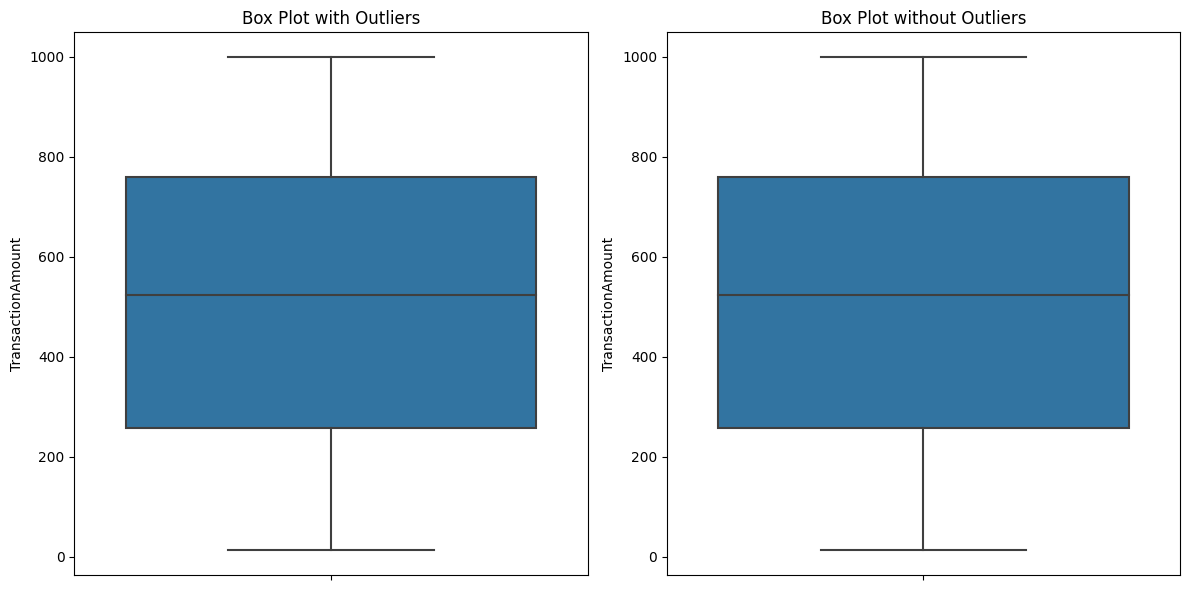

In [53]:
# visualization of the outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='TransactionAmount')
plt.title('Box Plot with Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers, y='TransactionAmount')
plt.title('Box Plot without Outliers')

plt.tight_layout()
plt.show()

## **RFM - Recency, Frequency, Monetary Value**

In [54]:
# calculating Recency, Frequency and Monetary Value - RFM

# Recency
df['Recency'] = (datetime.now().date() - df['PurchaseDate'].dt.date).dt.days

# Frequency
frequencydf = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequencydf.rename(columns={'OrderID' : 'Frequency'}, inplace=True)
df = df.merge(frequencydf, on='CustomerID', how='left')

# Monetary value
monetarydf = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetarydf.rename(columns={'TransactionAmount' : 'MonetaryValue'}, inplace=True)
df = df.merge(monetarydf, on='CustomerID', how='left')

print(df.head())


   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  Recency  Frequency  MonetaryValue  
0     Tokyo      186          1         943.31  
1    London      186          1         463.70  
2  New York      186          1          80.28  
3    London      186          1         221.29  
4     Paris      186          1         739.56  


In [55]:
# Calculating RFM scores

# defining the scoring criteria for each of the RFM values
recencyscores = [5, 4, 3, 2, 1]
frequencyscores = [1, 2, 3, 4, 5]
monetaryscores = [1, 2, 3, 4, 5]

# calculating rfm scores
# using pd.cut() function to calculate the rfm scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recencyscores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequencyscores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetaryscores)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScore      1000 non-null   category      
 11  MonetaryScore       1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 81.7+ KB


In [56]:
# changing the data type of the rfm from categorical to numerical
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   int64         
 10  FrequencyScore      1000 non-null   int64         
 11  MonetaryScore       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 101.6+ KB


### **RFM Segmentation**

In [57]:
# final rfm score

df['RfmScore'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# dividing the scores into low, mid and high values
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']

# the pd.qcut() function is used for segmentation
df['Value Segment'] = pd.qcut(df['RfmScore'], q=3, labels=segment_labels)

print(df.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  Recency  Frequency  MonetaryValue  RecencyScore  FrequencyScore  \
0     Tokyo      186          1         943.31             1               1   
1    London      186          1         463.70             1               1   
2  New York      186          1          80.28             1               1   
3    London      186          1         221.29             1               1   
4     Paris      186          1         739.56             1               1   

   MonetaryScore  RfmScore Value Segment  
0            

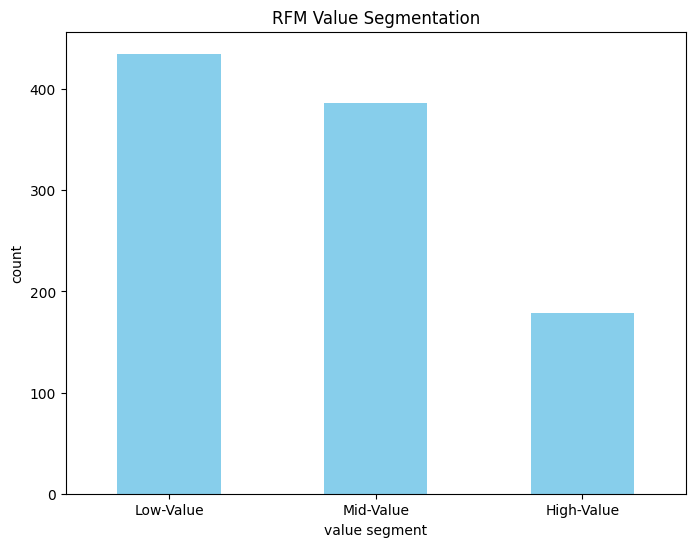

In [58]:
# Graphical presentation of Rfm Segmentation using bar plots
segment_counts = df['Value Segment'].value_counts()

plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('RFM Value Segmentation')
plt.xlabel('value segment')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()


In [59]:
# RFM Customer Segmentation
df['Rfm Customer Segment'] = ''  # created a new column to store the customer segmentataion

df.loc[df['RfmScore'] >= 9, 'RFM Customer Segment'] = 'Winners'
df.loc[(df['RfmScore'] >= 6) & (df['RfmScore'] < 9), 'RFM Customer Segment'] = 'Potential Loyalists'
df.loc[(df['RfmScore'] >= 5) & (df['RfmScore'] < 6), 'RFM Customer Segment'] = 'At Risk Customers'
df.loc[(df['RfmScore'] >= 4) & (df['RfmScore'] < 5), 'RFM Customer Segment'] = 'Cannot Lose'
df.loc[(df['RfmScore'] >= 3) & (df['RfmScore'] < 4), 'RFM Customer Segment'] = 'Lost'

print(df[['CustomerID', 'RFM Customer Segment']])


     CustomerID RFM Customer Segment
0          8814          Cannot Lose
1          2188                 Lost
2          4608                 Lost
3          2559                 Lost
4          9482          Cannot Lose
..          ...                  ...
995        2970  Potential Loyalists
996        6669  Potential Loyalists
997        8836  Potential Loyalists
998        1440  Potential Loyalists
999        4759  Potential Loyalists

[1000 rows x 2 columns]


In [60]:
# Graphical representation
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segment']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segment'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

In [61]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = df.groupby('RFM Customer Segment')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segment'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segment'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segment'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()
